### <font color=black> IMPORT:: <font color=blue> **py modules** </font> </font>

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
from mpl_toolkits.basemap import Basemap
import glob
import os
import shutil
import re
import cartopy
import matplotlib.ticker as mticker
import matplotlib.pyplot as plt
#
%matplotlib inline
# %matplotlib notebook
#
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap, BoundaryNorm
#
# PD=os.getcwd(); PD


### <font color=blue> Choose:: <font color=red> **Folder & Scenario**  </font>

In [2]:
ci='low_confidence'
ssp='ssp126'
#
pathG='/scratch/pk695/FACTS/NZrerun-pk695/GREGS_data2NZ/{arg0}/{arg1}/'.format(arg0=ci,arg1=ssp)
pathP='/scratch/pk695/FACTS/nzOG-pk695/local-pk695/006_confidence_output_files/{arg0}/{arg1}/'.format(arg0=ci,arg1=ssp)
#
flist=sorted(os.listdir(pathG)); flist

['AIS_ssp126_low_confidence_rates.nc',
 'AIS_ssp126_low_confidence_values.nc',
 'GIS_ssp126_low_confidence_rates.nc',
 'GIS_ssp126_low_confidence_values.nc',
 'glaciers_ssp126_low_confidence_rates.nc',
 'glaciers_ssp126_low_confidence_values.nc',
 'landwaterstorage_ssp126_low_confidence_rates.nc',
 'landwaterstorage_ssp126_low_confidence_values.nc',
 'oceandynamics_ssp126_low_confidence_rates.nc',
 'oceandynamics_ssp126_low_confidence_values.nc',
 'total_ssp126_low_confidence_rates.nc',
 'total_ssp126_low_confidence_values.nc',
 'verticallandmotion_ssp126_low_confidence_rates.nc',
 'verticallandmotion_ssp126_low_confidence_values.nc']

## <font color=blue> Choose::  <font color=red> **File & Variable** </font>  

In [3]:
# file='AIS_{arg0}_{arg1}_values.nc'.format(arg0=ssp,arg1=ci); var='sea_level_change'
# file='AIS_{arg0}_{arg1}_rates.nc'.format(arg0=ssp,arg1=ci); var='sea_level_change_rate'

# file='GIS_{arg0}_{arg1}_rates.nc'.format(arg0=ssp,arg1=ci); var='sea_level_change_rate'
# file='GIS_{arg0}_{arg1}_values.nc'.format(arg0=ssp,arg1=ci); var='sea_level_change'

# file='glaciers_{arg0}_{arg1}_rates.nc'.format(arg0=ssp,arg1=ci); var='sea_level_change_rate'
# file='glaciers_{arg0}_{arg1}_values.nc'.format(arg0=ssp,arg1=ci); var='sea_level_change'

# file='landwaterstorage_{arg0}_{arg1}_rates.nc'.format(arg0=ssp,arg1=ci); var='sea_level_change_rate'
# file='landwaterstorage_{arg0}_{arg1}_values.nc'.format(arg0=ssp,arg1=ci); var='sea_level_change'

# file='oceandynamics_{arg0}_{arg1}_rates.nc'.format(arg0=ssp,arg1=ci); var='sea_level_change_rate'
# file='oceandynamics_{arg0}_{arg1}_values.nc'.format(arg0=ssp,arg1=ci); var='sea_level_change'

# file='total_{arg0}_{arg1}_rates.nc'.format(arg0=ssp,arg1=ci); var='sea_level_change_rate'
# file='total_{arg0}_{arg1}_values.nc'.format(arg0=ssp,arg1=ci); var='sea_level_change'

# file='verticallandmotion_{arg0}_{arg1}_rates.nc'.format(arg0=ssp,arg1=ci); var='sea_level_change_rate'
file='verticallandmotion_{arg0}_{arg1}_values.nc'.format(arg0=ssp,arg1=ci); var='sea_level_change'

# labels
EXP_G=pathG.split('/')[5].split('_')[0]
EXP_P=pathP.split('/')[4].split('-')[1]
EXP_file=file

## <font color=blue> List::  <font color=red> **Data Details** </font>  

In [4]:
d_ncG=xr.open_dataset(pathG+file);  
d_ncP=xr.open_dataset(pathP+file);
# d_ncP

In [5]:
# Find the common locations
idx=0
# latG=np.round(d_ncG['lat'][idx].values,4); lonG=np.round(d_ncG['lon'][idx].values,4)
latG=d_ncG['lat'][idx].values; lonG=d_ncG['lon'][idx].values
latP=d_ncP['lat'][idx].values; lonP=d_ncP['lon'][idx].values
print('lonP=',lonP,'latP=',latP,)
print('lonG=',lonG,'latG=',latG,)
print( '\n' )
print('d_ncG=',d_ncG[var].shape)
print('d_ncP=',d_ncP[var].shape)
print( '\n' )

lonP= 173.11751 latP= -34.740926
lonG= 173.11751 latG= -34.740926


d_ncG= (107, 30, 7435)
d_ncP= (107, 15, 7435)




In [6]:
print('G years  '+str(d_ncG['years'].values)+'\n')
print('P years  '+str(d_ncP['years'].values)+'\n')

G years  [2005 2020 2030 2040 2050 2060 2070 2080 2090 2100 2110 2120 2130 2140
 2150 2160 2170 2180 2190 2200 2210 2220 2230 2240 2250 2260 2270 2280
 2290 2300]

P years  [2005 2020 2030 2040 2050 2060 2070 2080 2090 2100 2110 2120 2130 2140
 2150]



## <font color=blue> Xtract:: </font>  

### <font color=blue> YEAR:: <font color=red> **index** </font>

In [7]:
yrST=2020; yrEN=2150
yr=np.arange(yrST, yrEN+1, 10)
print('Years to select='+str(yr)+'\n')

yrIDX_G=np.searchsorted(d_ncG['years'].values, yr)
yrIDX_P=np.searchsorted(d_ncP['years'].values, yr)

print('Idx G year'+str(d_ncG['years'][yrIDX_G].values)+'\n')
print('Idx P year'+str(d_ncP['years'][yrIDX_P].values)+'\n')

Years to select=[2020 2030 2040 2050 2060 2070 2080 2090 2100 2110 2120 2130 2140 2150]

Idx G year[2020 2030 2040 2050 2060 2070 2080 2090 2100 2110 2120 2130 2140 2150]

Idx P year[2020 2030 2040 2050 2060 2070 2080 2090 2100 2110 2120 2130 2140 2150]



### <font color=blue> Percentile:: <font color=red> **index** </font>

In [11]:
ptile=[5,17,50,83,95]

ptileIDX_G=np.searchsorted(d_ncG['quantiles'].values*100, ptile)
ptileIDX_P=np.searchsorted(d_ncP['quantiles'].values*100, ptile)

# DUM1=ptileIDX_G; DUM2=d_ncG['quantiles'][ptileIDX_G].values*100
# for pid, pt in zip(DUM1, DUM2):
#     print(f"index {pid} has percentile value {pt}")

array([ 7, 20, 53, 86, 99])

### <font color=blue> PLOT:: <font color=red> **1D Slice** </font>

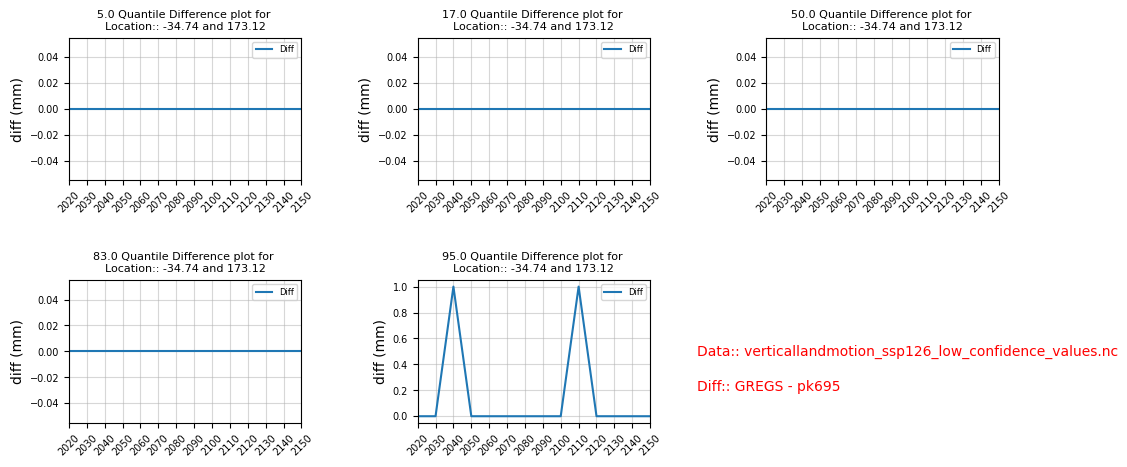

In [13]:
loc=0 #Location:: choose from 0 to 7434           

slcG=d_ncG[var][ptileIDX_G, yrIDX_G, loc]
slcP=d_ncP[var][ptileIDX_P, yrIDX_P, loc]
diff=slcG-slcP

latP=d_ncP['lat'][loc].values
lonP=d_ncP['lon'][loc].values

xx=d_ncG['years'][yrIDX_G].values

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 5))

for i, pp in enumerate(ptileIDX_G):
    
    row, col = divmod(i, 3)
    ax = axs[row, col]
    
    yy1=diff[i,:]
    ax.plot(xx, yy1, label='Diff')
    
    ax.set_xlim(2020, 2150); ax.set_xticks(range(2020, 2160, 10))
    ax.tick_params(axis='x', labelrotation=45,labelsize=7)
    ax.tick_params(axis='y', labelsize=7)
    ax.grid(alpha=0.5)
    ax.set_ylabel('diff (mm)'); #ax.set_xlabel('Years')
    
    LAT=str(np.round(latP,2)); LON=str(np.round(lonP,2))
    QUANT=str(d_ncP['quantiles'][pp].values*100)
    ax.set_title(QUANT+' Quantile Difference plot for \n'+'Location:: '+LAT+' and '+LON,fontsize=8)
    ax.legend(fontsize=6)

ax.text(1.2, .5, 'Data:: '+EXP_file, fontsize=10, color='red', transform=ax.transAxes, ha='left', va='center')
ax.text(1.2, .25, 'Diff:: '+EXP_G+' - '+ EXP_P, fontsize=10, color='red', transform=ax.transAxes, ha='left', va='center')
axs[1, 2].remove()

plt.subplots_adjust(wspace=0.5, hspace=0.7)
plt.show()

### <font color=blue> PLOT:: <font color=red> **2D Slice** </font>

<function ndarray.max>

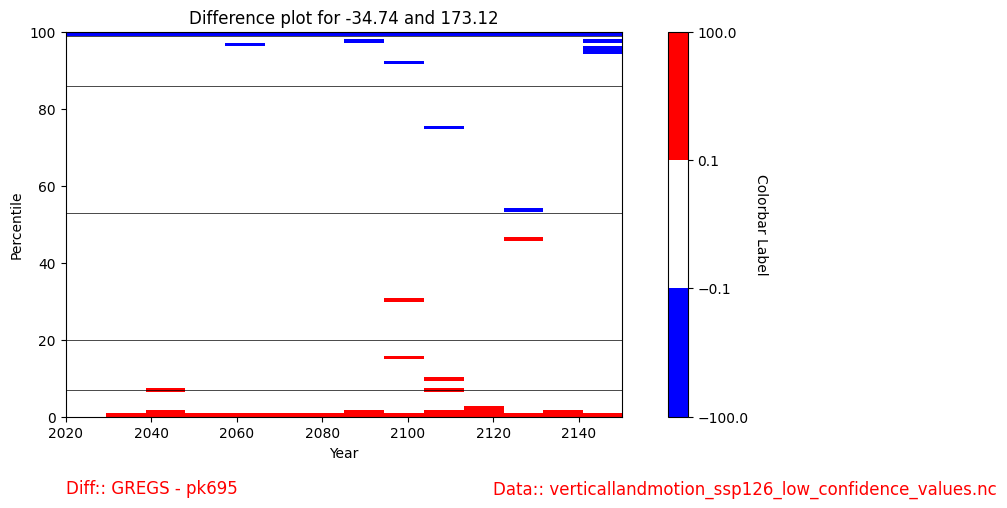

In [25]:
loc=0           #loc

slcG2D=d_ncG[var][:, yrIDX_G, loc].values
slcP2D=d_ncP[var][:, yrIDX_P, loc].values
diff2D = slcG2D - slcP2D

xx=d_ncP['years'][yrIDX_P].values
yy=d_ncP['quantiles'].values*100
zz=diff2D

# Define the color boundaries and colors for the colormap
bounds = [-100, -0.1, 0.1, 100]
colors = ['blue', 'white', 'red']

# Create the colormap and normalization object
cmap = ListedColormap(colors)
norm = BoundaryNorm(bounds, len(colors))

fig, ax = plt.subplots(figsize=(12,5))
im = ax.imshow(zz, extent=[xx.min(), xx.max(), yy.min(), yy.max()], cmap=cmap, norm=norm)

cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel('Colorbar Label', rotation=-90, va="bottom")
ax.set_aspect(0.9)
ax.set_xlabel('Year')
ax.set_ylabel('Percentile')
ax.set_title('Difference plot for '+LAT+' and '+LON)
ax.set_xlim(2020, 2150)
# ax.set_ylim(0, 100)

for val in ptileIDX_P:
    plt.axhline(y=val, color = 'k', linestyle = '-', linewidth=0.5)
# plt.yticks(y_values)

plt.text(2120, -20, 'Data:: '+EXP_file, fontsize=12, color='red')
plt.text(2020, -20, 'Diff:: '+EXP_G+' - '+ EXP_P,fontsize=12, color='red')

plt.show()

### <font color=blue> PLOT:: <font color=red> **3D Slice** </font>

In [ ]:
# stn= np.arange(0,d_ncG[var].shape[2])
# loc=0           #loc

# slcG3D=d_ncG[var][ptile_idx,yr,stn].values
# slcP3D=d_ncP[var][ptile_idx,yr,stn].values
# diff3D = slcG3D - slcP3D

# XX=d_ncG['quantiles'][ptile_idx].values*100
# YY=d_ncG['years'][yr].values
# ZZ=np.arange(diff3D.shape[2])
# VAR=diff3D

# x, y, z = np.meshgrid(XX, YY, ZZ)


# fig = plt.figure(figsize=(10, 10))
# ax = fig.add_subplot(111, projection='3d')
# PP=ax.scatter3D(x.flatten(), y.flatten(), z.flatten(), c=VAR.flatten(), cmap='coolwarm')
# ax.set_xlabel('Percentile')
# ax.set_ylabel('Year'); #ax.set_yticks(rotation=90)
# ax.set_zlabel('Station')
# # ax.set_xticks(data_ptile)
# # fig.colorbar(PP)
# cbar=plt.colorbar(PP,fraction=0.026, pad=0.14)
# # plt.show()
# cbar.set_label('Diff', rotation=270)